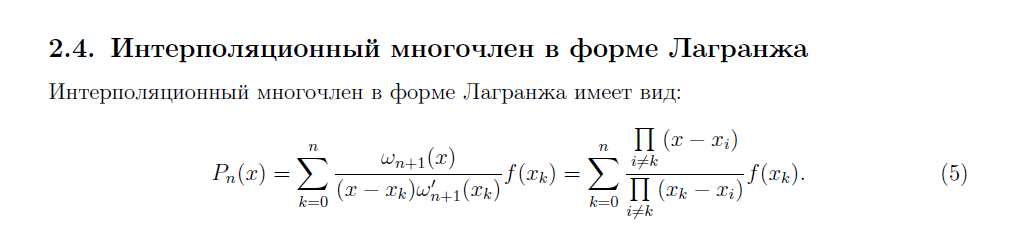

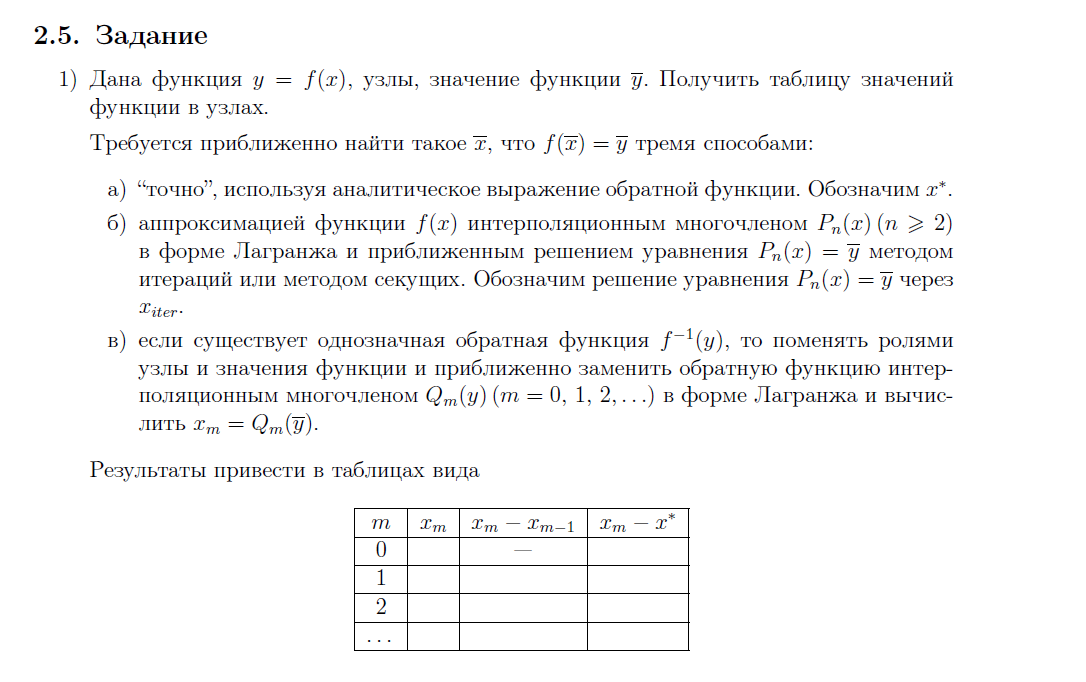

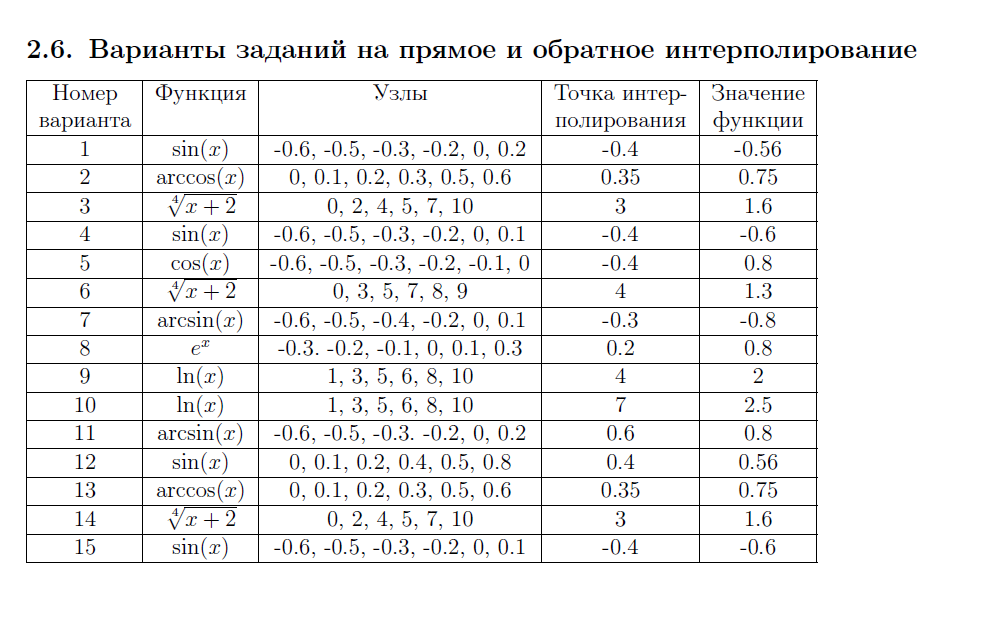

# Решение 

In [29]:
from math import acos
from math import cos

Метод, принимающий функцию, узлы и точку, в которой нужно посчитать значение.

In [50]:
def lagrange(f, x_list, point):
    result = 0
    for i in range(len(x_list)):
        numerator = 1 
        denominator  = 1
        for j in range(len(x_list)):
            if j != i:
                numerator = numerator * (point - x_list[j])
                denominator  = denominator  * (x_list[i] - x_list[j])                   
        result = result + f(x_list[i]) * numerator / denominator 
    return result

In [51]:
x_list = [-0.6, -0.5, -0.3, -0.2, -0.1, 0]

In [52]:
lagrange(cos, x_list, -0.4)

0.9210610575329474

In [53]:
cos(-0.4)

0.9210609940028851